# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (9)

**07/11/2022**

# Random Forest Regression

Los modelos de ***Decision Tree Regression*** son capaces de encontrar la relación entre la variable objetivo y un conjunto de variables independientes, incluso cuando la relación no tiene una forma lineal (**poco sesgo/bias**).  

 El mayor desventaja de éstos métodos es que para tener una precición aceptable suelen llegar a tener una *profundidad* considerable que les expone al peligro de ***Overfitting*** y depender demasiado de los datos entrenados, de modo que al cambiar ligeramiente los datos de entrada, se obtengan resultados muy diversos (**mucha varianza**)

## Ensemble Learning

Los métodos de *ensamble de modelos* o el **aprendizaje conjunto** intentan combinar diferentes modelos de base para mejorar el rendimiento de los modelos de Machine Learning que pueden sufrir de tener errores en la predicción (bias) y confiabilidad de los resultados (varianza).

En otras palabras, el *Enseble Learning* es el proceso de entrenar múltiples modelos de aprendizaje automático y combinar sus resultados para crear un modelo predictivo óptimo que tenga una mayor estabilidad y genere predicciones más precisas.

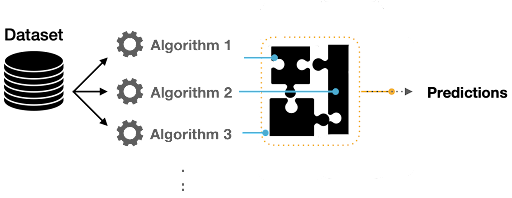

Existen diferentes enfoques para combinar los modelos de base (*base learners*) y generar un ensemble o un conjunto que sea mejor que cada uno de ellos. Lo métodos de **Bagging** and **Boosting** son de los más utilizados:

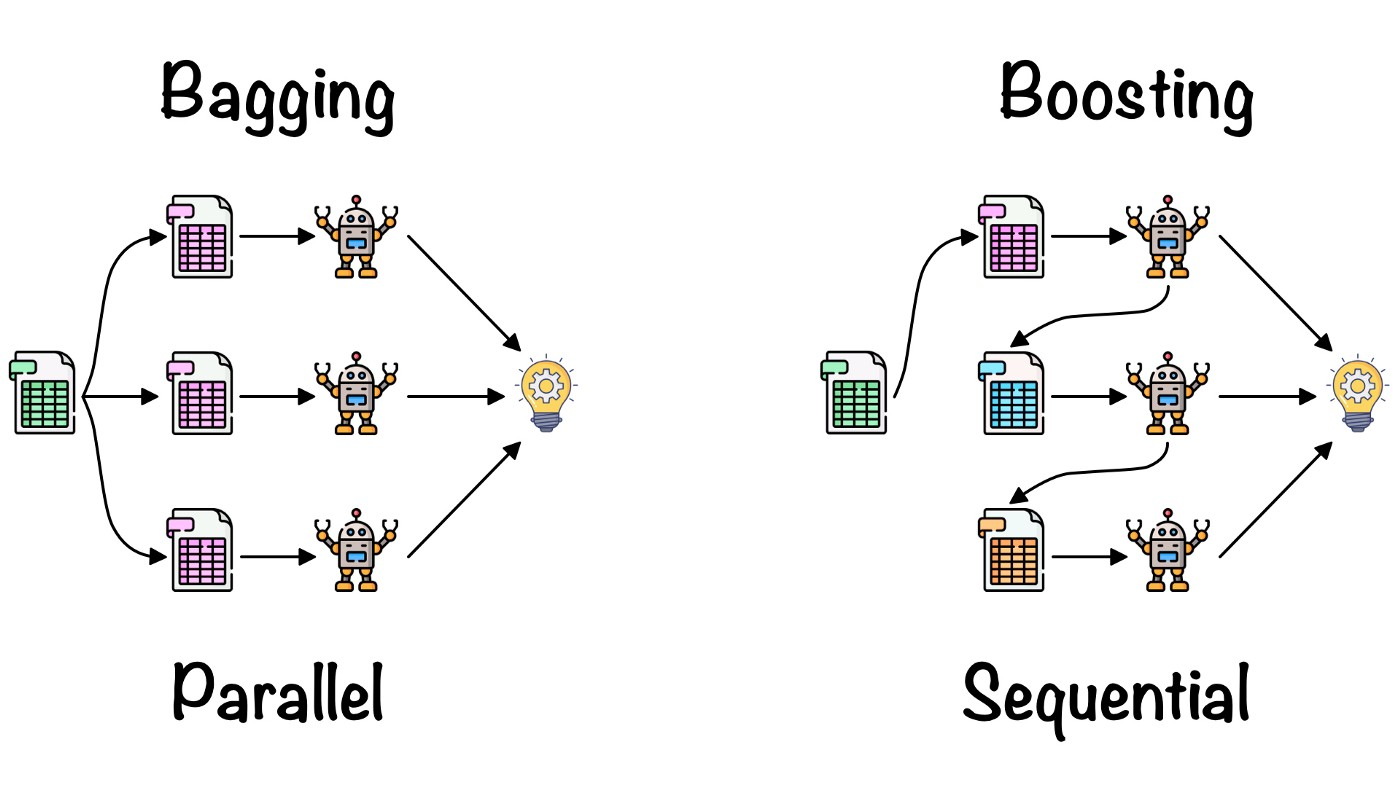

- ### **Bagging**: 
Este enfoque consiste en utilizar múltiples modelos de base que se entrenan en paralelo y cada uno por separado mediante un subconjunto de muestras seleccionadas aleatoriamente y con repeticiones del conjunto de datos de entrenamiento (***bootstrapping***). Después, se considera la media de todas las predicciones como el valor final (en caso de problemas de *Regresión*) o la clase más frecuente (en caso de problemas de *Clasificación*).

- ### **Boosting**:
La idea central detrás del enfoque de *boosting* es ajustar secuencialmente múltiples modelos sencillos (*weak learners*), donde cada modelo intenta mejorar o corregir los errores cometidos en el anterior. De este modo y con la implementación de varios modelos de forma secuencial, se puede conseguir una estabilidad mayor con resultados más precisos, tomando la combinación de todas las predicciones (*variables continuas*) o la clase más frecuente (*variables cualitativas/categóricas*) como la predicción final del ensemble.

## Bosque Aleatorio

Un modelo de **bosque aleatorio** o **Random Forest** está formado por un conjunto de árboles de decisión, cada uno entrenado con un subconjunto distinto de datos extraídos de forma aleatoria de los datos de entrenamiento originales usando la técnica de ***bootstrapping***.  

Esto quiere decir que **cada árbol se entrena en paralelo con una muestra distinta** y el valor final de una nueva observación se calcula con la media de las predicciones de todos los árboles individuales que componen el bosque.

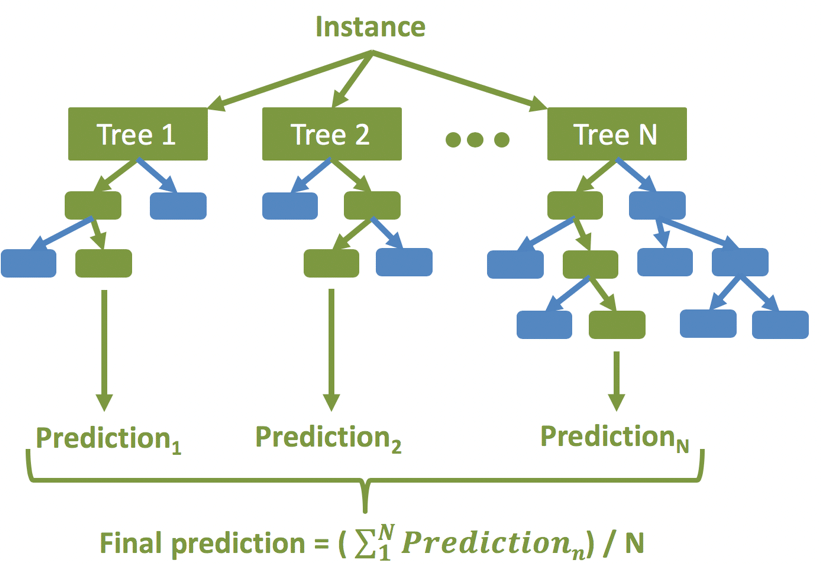

Volvemos a generar un modelo para predecir los precios de viviendas en Boston:

In [ ]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

In [ ]:
# Importamos los datos de la misma librería de scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

# Convertir los datos en pandas dataframe
dataframe_x = pd.DataFrame(boston.data, columns = boston.feature_names)

# La variable dependiente es el target y la llamammos dataframe_y
dataframe_y = pd.DataFrame(boston.target, columns = ['target'])

# Combinamos ambos para obtener un dataframe con todas las variables explicativas y la variable objetivo
df_boston = dataframe_x.join(dataframe_y)

df_boston

Características del conjunto de datos:
 
    -Número de muestras: 506
 
    -Número de atributos: 13 predictivo numérico / categórico
 
    -Median value (atributo 14) suele ser el objetivo.
    
Información de atributos (en orden):

        - CRIM tasa de delincuencia per cápita por ciudad
        - Proporción ZN de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
        - Proporción INDUS de acres comerciales no minoristas por ciudad 
        - Variable ficticia CHAS Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
        - Concentración de óxidos nítricos NOX (partes por 10 millones)
        - RM número medio de habitaciones por vivienda
        - Proporción de EDAD de las unidades ocupadas por el propietario construidas antes de 1940
        - Distancias ponderadas DIS a cinco centros de empleo de Boston
        - Índice RAD de accesibilidad a carreteras radiales
        - IMPUESTO Tasa de impuesto a la propiedad de valor total por \$ 10,000\
        - PTRATIO Ratio maestro-alumno por municipio
        - B 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
        - LSTAT % menor estatus de la población
        - MEDV Valor medio de las viviendas ocupadas por el propietario en \$ 1000\

In [ ]:
# La información principal del dataset
df_boston.info()

Definimos los datos del modelo con todas las variables de entrada **menos la variable éticamente incorrecta**


In [ ]:
X_multiple = df_boston.drop(['target', 'B'], axis='columns')
y_multiple = df_boston['target']

A pesar de que es una práctica común y recomendada, esta vez no modificamos la *[estructura de datos](https://scikit-learn.org/stable/glossary.html#term-array-like)* antes de pasarlo al modelo.

In [ ]:
X_multiple

In [ ]:
y_multiple

In [ ]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=222)

#### Aplicar el modelo de regresión no-lineal con “Bosques Aleatorios”: **Random Forest Regressor** 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(random_state = 77)

In [ ]:
# Ajustamos el algoritmo al conjunto de datos de entrenamiento

bosque.fit(X_train, y_train)

In [ ]:
# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)

y_pred = bosque.predict(X_test) 

#### Evaluación del modelo a través de sus métricas

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))

A primera vista vemos que obtenemos una **buena precisión con el modelo por defecto**, comparando con métodos como *Regresión Lineal* o *Decision Tree* que se desarrollaron en sesiones anteriores. 

In [ ]:
# visualizamos las predicciones
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.title('y_test vs predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()

Vamos a obtener más información acerca del modelo:

In [ ]:
print("El número de los árboles que forman el bosque:", bosque.n_estimators)

In [ ]:
# Parámetros indicados en la definicón del bosque
bosque.get_params()

Para visualizar el contenido del bosque aleatorio, podemos **graficar alguno de los árboles de regresión** utilizados en el modelo:

In [ ]:
# Visualizar uno de los árboles
from sklearn import tree
fig = plt.figure(figsize=(25,20), dpi=300)

index = 55  # El indicdor del árbol de decisión
tree.plot_tree(bosque.estimators_[index],
               feature_names = X_train.columns.values,
               class_names="target",
               filled = True)
plt.title('Estimator: ' + str(index), fontsize = 11)
plt.show()

In [ ]:
# Consultamos la profundidad del árbol visualizado dentro del bosque
bosque.estimators_[55].get_depth()

In [ ]:
# Consultamos la profundidad de todos los 100 árboles del bosque (usando los bucles)
bosque_profundidades = []
for arbol in bosque.estimators_:
    profundidad = arbol.get_depth()
    bosque_profundidades.append(profundidad)

bosque_profundidades

In [ ]:
# Consultamos la profundidad de todos los 100 árboles del bosque (usando List Comprehension)
bosque_profundidades_LC = [arbol.get_depth() for arbol in bosque.estimators_]
bosque_profundidades_LC

In [ ]:
# Revisamos las estadísticas de este dato
pd.Series([arbol.get_depth() for arbol in bosque.estimators_]).describe()

Procedemos a generar otro bosque **con menos profundidad** en sus árboles:

In [ ]:
bosque2 = RandomForestRegressor(max_depth=4,
                                n_jobs=-1,
                                random_state=77)

In [ ]:
bosque2.fit(X_train, y_train)
y_pred = bosque2.predict(X_test) 

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))

In [ ]:
# Sacar diferentes parámetros del bosque que se ha entrenado
bosque2.__getstate__()

El resultado se puede considerar como un modelo aceptable. Sin embargo, es evidente que para este tipo de modelos deberíamos de buscar la mejor combinación de los **hiperparámetros**.  

Antes de empezar a investigar los hiperparámetros vamos a revisar una métrica de calidad del modelo llamado **out-of-bag (OOB)** que hace referencia a una medida de error o precisión que se puede calcular para un modelo de *Random Forest* en el proceso de entrenamineto. 


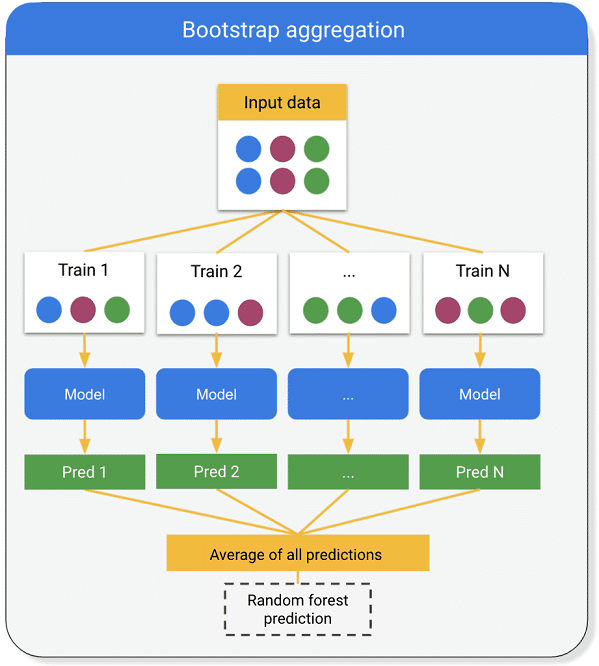

El proceso de ***Bagging*** que proviene de los términos de ***Bootstrap Aggregation*** se basa en ajustar los modelos de base (árboles de decisión en caso de Random Forest) empleando **subconjuntos de muestras extraídas aleatoriamente por *bootstrapping* que permiten la repetición de datos**. Cada árbol se puede estimar que solo contenga aproximadamente dos tercios (0.632) de las observaciones originales. Al tercio restante se le llama **out-of-bag (OOB)**.

Para cada observación podemos hacer un promedio de la respuestas de aquellos árboles en los que esa observación ha sido excluida. De esta manera se pueden conseguir las predicciones para las ***n*** observaciones y posteriormente calcular la métrica de error o de precisión (como $R^2$ o *MSE* de OOB-error). 

El ***OOB-error*** se puede calcular al mismo tiempo que se genera el bosque aleatorio, por lo tanto, sirve como estimación del error de test o como la de **validación cruzada** (*Cross-Validation*), ya que **para cada observación se estima la respuesta utilizando únicamente los árboles en cuyo entrenamiento no participó dicha observación**.

Ahora revisamos el **tamaño del bosque** o mejor dicho la cantidad de los árboles que le forman: ***n_estimators*** 

In [ ]:
np.arange(10,301,10)

In [ ]:
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(10,301,10)
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size)
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_bosque = RandomForestRegressor(n_estimators=hiper_param[i],
                                       n_jobs=-1,
                                       oob_score=True,
                                       random_state=77)
    mod_bosque.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_bosque.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_bosque.predict(X_test))    
    oob_score[i] = mod_bosque.oob_score_   

print("El mejor valor de n_estimator podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(test_r2)], max(test_r2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_estimator)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()



Los modelos de Random Forest **no suelen tener mucha dependencia al número de los árboles** a partir de un determinado tamaño. Vemos que en este caso el rendimiento aceptable incluso se consigue con la mitad de los árboles incluidos por defecto que son 100.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(n_estimators=50,
                               n_jobs=-1,
                               oob_score=True,
                               random_state = 77)
bosque.fit(X_train, y_train)
y_pred = bosque.predict(X_test) 

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))
print('R^2 of OOB:', bosque.oob_score_)

In [ ]:
# Consultamos las profundidades de los árboles del bosque
pd.Series([arbol.get_depth() for arbol in bosque.estimators_]).describe()

Teniendo una idea sobre el número de los árboles podemos echar un vistazo a la profundidad de los árboles: ***max_depth***

In [ ]:
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(2,20)
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size)
oob_score = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_bosque = RandomForestRegressor(max_depth=hiper_param[i],
                                       n_estimators=50,
                                       n_jobs=-1,
                                       oob_score=True,
                                       random_state=77)
    mod_bosque.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_bosque.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_bosque.predict(X_test))    
    oob_score[i] = mod_bosque.oob_score_   

print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_r2)],
      " que consigue un R2 =", max(test_r2))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(test_r2)], max(test_r2),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()



Construimos un modelo con la profundidad elegida a raíz del análisis de complejidad en el gráfico anterior.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(n_estimators=50,
                               max_depth=9,
                               n_jobs=-1,
                               oob_score=True,
                               random_state = 77)
bosque.fit(X_train, y_train)
y_pred = bosque.predict(X_test) 

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))
print('R^2 of OOB:', bosque.oob_score_)

In [ ]:
# Consultamos las profundidades
pd.Series([arbol.get_depth() for arbol in bosque.estimators_]).describe()

Uno de los hiperparámetros más importantes y críticos sería el ***max_features***, que es el número de predictores considerados en cada bifurcación de los árboles y **determina cuánto se decorrelacionan los árboles entre sí**.

In [ ]:
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(1, X_train.shape[1] + 1, 1)
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size) 
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_bosque = RandomForestRegressor(max_features=hiper_param[i],
                                       max_depth=9,
                                       n_estimators=50,
                                       n_jobs=-1,
                                       random_state=77,
                                       oob_score=True)
    mod_bosque.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_bosque.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_bosque.predict(X_test))
    oob_score[i] = mod_bosque.oob_score_   

print("El mejor valor de max_features podría ser =", hiper_param[np.argmax(oob_score)],
      " que consigue un R2 =", max(oob_score))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(oob_score)], max(oob_score),
        marker='o', color = "red", label="max R^2")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_features)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()



Evaluamos el modelo que nos indican los análisis de complejidad del modelo.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

bosque = RandomForestRegressor(max_features=6,
                               max_depth=9,
                               n_estimators=50,
                               n_jobs=-1,
                               oob_score=True,
                               random_state=77)
bosque.fit(X_train, y_train)
y_pred = bosque.predict(X_test) 

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))
print('R^2 of OOB:', bosque.oob_score_)

Para asegurarnos y tener una visión del grado de posible sobre-ajuste u *Overfitting* que puede tener el modelo, podemos analizar su rendimiento frente al tamaño de los datos utilizados en entrenamiento (**Learning Curve**). 

In [ ]:
# Definimos una función que toma el valor de los hiperparámetros y 
# dibuja la evolución del rendimiento del modelo para el conjunto de training y de test: 
def curva_aprendizaje_rf(n_arboles: int,
                         profundidad: int,
                         n_var: int):
    """Función para sacar la gráfica de Learning Curve a partir de los hiperparámetros del bosque"""

    # Generar la estructura del modelo
    modelo_bosque = RandomForestRegressor(n_estimators=int(n_arboles),
                                          max_depth=int(profundidad),
                                          max_features=int(n_var),
                                          oob_score=True,
                                          n_jobs=-1,
                                          random_state=77)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(20,X_train.shape[0]).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)
    oob_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_bosque.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train[:num_samples[i]], modelo_bosque.predict(X_train[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test, modelo_bosque.predict(X_test))
        oob_score[i] = modelo_bosque.oob_score_

    print("La diferencia de R^2 entre training y OOB es= ", train_R2[-1]-oob_score[-1])

    # Graficamos el R_cuadrado de training versus de test
    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.plot(num_samples, oob_score, label = 'OOB R^2')
    plt.title('Curva de aprendizaje (Learning Curve) para max_features = %s' % n_var)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()    


Sacamos la grafica de aprendizaje para el último modelo contruido en base a los análisis de los hiperparámetros.

In [ ]:
curva_aprendizaje_rf(n_arboles=50,
                     profundidad=9,
                     n_var=6)

In [ ]:
curva_aprendizaje_rf(n_arboles=400,
                     profundidad=30,
                     n_var=12)

---

### **`Ejercicio 9.1`**

- **`9.1.1`** Para los rangos indicados, realiza una búsqueda del modelo óptimo usando la técnica de *Grid Search*.
-            parametros={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [6, 7, 8, 9, 10, 11, 12],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]}

- **`9.1.2`** Visualiza los resultados del mejor modelo conseguido con la gráfica de *"Valores reales vs. predichos"* para el conjunto de test.
- **`9.1.3`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.
    - MAE
    - MAPE
    - MSE
    - RMSE
    - $R^2$    
      
- **`9.1.4`** Saca la gráfica del *Learning Curve* para el modelo óptimo, usando la función definida en la sesión y explica si este modelo tiene preferencia o no, para ser elegido en práctica como predictor de precios de viviendas comparando con el modelo inicial. Si tienes otra recomendación indica el modelo que en crees que sería la mejor opción explicando tu opinión al respecto.   

In [ ]:
## Solución
# Ejercicio 9.1.1


In [ ]:
## Solución
# Ejercicio 9.1.2


In [ ]:
## Solución
# Ejercicio 9.1.3


In [ ]:
## Solución
# Ejercicio 9.1.4


---

### Dataset de **Advertising**

Este dataset consiste en un conjunto de datos sobre el gasto publicitario de diversos productos en campañas de marketing realizados por diferentes medios:  
 - **TV**: gastos en las cadenas de televisión.
 - **Radio**: gastos en las emisoras de la radio.
 - **Newspaper**: gastos en los periódicos.

La variable **Sales** contiene las ventas conseguidas según el gasto invertido en la publicidad por diferentes plataformas.  



 Vamos a realizar un estudio por si somos capeces de predecir esta variable en función de los gastos publicitarios. Primero procedemos a la carga de los datos:

In [ ]:
df_adv = pd.read_csv("Advertising.csv")
df_adv

In [ ]:
# Sacamos la información interesante relacionado con el datast
df_adv.info()

Como se pueden ver existen varias columnas con valores nulos (*missing values*) que los debemos de quitar del DataFrame.

In [ ]:
# Consultar si hay valores perdidos
df_adv.isna().sum()

In [ ]:
# Identificar los registros con valores perdidos
df_adv.drop(df_adv.dropna().index)

In [ ]:
# Quitar los registros que contienen algún valor nulo y reestablecer los índices
df_adv = df_adv.dropna()
df_adv = df_adv.reset_index(drop=True)

In [ ]:
# Consultar las estadísticas de los datos de la tabla
df_adv.describe()

In [ ]:
# Definir las variables de entrada y la variable objetivo
X = df_adv.drop('Sales', axis='columns')
y = df_adv['Sales']

In [ ]:
# Consultar los predictores del modelo a desarrollar
X

In [ ]:
# Consultar la variable objetivo
y

In [ ]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
# Generar un modelo inicial y calcular las predicciones
from sklearn.ensemble import RandomForestRegressor


bosque_adv = RandomForestRegressor(random_state=44)

bosque_adv.fit(X_train_adv, y_train_adv)

y_pred_adv = bosque_adv.predict(X_test_adv) 

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_adv, y_pred_adv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, y_pred_adv)*100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, y_pred_adv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, y_pred_adv)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, y_pred_adv))

Este resultado es bastante mejor comparando con el primer árbol de decisión ajustado a este dataset.

In [ ]:
# visualizamos las predicciones
plt.scatter(y_test_adv, y_pred_adv, color = 'red')
plt.plot(y_test_adv, y_test_adv, color = 'blue')
plt.title('y_test vs. predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()

---

### **`Ejercicio 9.2`**

**`9.2.1`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y OOB para el rango de tamaño del bosque entre `2` y `300` **inclusive** con pasos de `10` (poniendo `random_state=77`).  

**`9.2.2`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training, test y OOB para el rango de profundidades de los árboles del bosque entre `2` y `20` **inclusive** considerando el número óptimo de loa árboles estimado en el paso anterior (poniendo `random_state=77`). 

**`9.2.3`** Para el modelo con los hiperparámetros óptimos que se intuyen de los pasos anteriores, Calcula diferentes métricas para evaluarlo y analiza su rendimiendo en comparación con el modelo inicial.    
    - MAE  
    - MAPE  
    - MSE  
    - RMSE  
    - $R^2$  
    - OOB $R^2$  
    

**`9.2.4`** Para los rangos indicados, realiza una búsqueda del modelo óptimo usando la técnica de *Grid Search* de *`5-fold-CV`*.
-             parametros={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100,
                                          110, 120, 130, 140, 150, 160, 170,
                                          180, 190, 200, 210, 220, 230, 240, 250]}

**`9.2.5`** Visualiza los resultados del mejor modelo conseguido con la gráfica de *"Valores reales vs. predichos"* para el conjunto de test.  
  
**`9.2.6`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.  
    - MAE  
    - MAPE  
    - MSE  
    - RMSE  
    - $R^2$     


---

In [ ]:
## Solución
# Ejercicio 9.2.1


In [ ]:
## Solución
# Ejercicio 9.2.2


In [ ]:
## Solución
# Ejercicio 9.2.3


In [ ]:
## Solución
# Ejercicio 9.2.4


In [ ]:
## Solución
# Ejercicio 9.2.5


In [ ]:
## Solución
# Ejercicio 9.2.6
